In [10]:
import webbrowser 
from PIL import Image
import pytesseract
import time

In [1]:
import pyautogui
pyautogui.PAUSE = 1
pyautogui.FAILSAFE = True      # 啟用自動防故障功能
width,height = pyautogui.size()

In [25]:
x,y = pyautogui.position()

In [26]:
print(str(x) + '/' + str(width) + ' , ' + str(y)+'/' + str(height))

555/1920 , 230/1080


In [55]:
from pynput import mouse
from  pynput.mouse import Button, Controller
import time 

def on_click(x, y , button, pressed):

    button_name = ''
    #print(button)
    if button == Button.left:
        button_name = 'Left Button'
        working = False
    elif button == Button.middle:
        button_name = 'Middle Button'
        working = False
    elif button == Button.right:
        button_name = 'Right Button'
        working = True
    else:
        button_name = 'Unknown'
    if pressed:
        print('{0} Pressed at {1} at {2}'.format(button_name, x, y))
    else:
        print('{0} Released at {1} at {2}'.format(button_name=='', x, y))
        
    if not pressed:
        return False

while True:
    with mouse.Listener(on_click = on_click,suppress = False) as listener:
        listener.join()

In [63]:
speech = "隨著hTC於2007年推出搭載Android作業系統的智慧型手機，hTC與Android作業系統自此急速發展，並於智慧型手機市場上佔有舉足輕重的地位。隨著Android作業系統的市佔率節節攀升，Apple深感威脅，並決定反擊，挑起了專利訴訟大戰，並將矛頭指向Android陣營中的主力戰將hTC，就此展開你來我往一連串的專利訴訟攻防。"

In [85]:
import jieba
import jieba.analyse
#jieba.set_dictionary('dict.txt.big')
#jieba.load_userdict("userdict.txt")
jieba.add_word('舉足輕重', freq=400, tag=None)
jieba.add_word('市佔率', freq=400, tag=None)
jieba.add_word('專利訴訟', freq=400, tag=None)

In [87]:

#ret = open(speech, "r").read()
words = jieba.cut(speech, cut_all=False)
print("Output 精確模式 Full Mode：")
for word in words:
    print(word)
tags = jieba.analyse.extract_tags(speech, 10)
print(tags)

Output 精確模式 Full Mode：
隨著
hTC
於
2007
年
推出
搭載
Android
作業
系統
的
智慧型
手機
，
hTC
與
Android
作業
系統
自此
急速
發展
，
並
於
智慧型
手機
市場
上
佔
有
舉足輕重
的
地位
。
隨著
Android
作業
系統
的
市佔率
節節
攀升
，
Apple
深感
威脅
，
並決定
反擊
，
挑起
了
專利訴訟
大戰
，
並將
矛頭
指向
Android
陣營
中
的
主力
戰將
hTC
，
就此
展開
你
來
我
往
一連串
的
專利訴訟
攻防
。
['Android', 'hTC', '作業', '系統', '隨著', '智慧型', '手機', '專利訴訟', '2007', '搭載']


infoGain= 0.863120568566631 bestFeature= 0 0.863120568566631 0.0
infoGain= 0.16958442967043919 bestFeature= 1 0.863120568566631 0.6935361388961918
{'over 18 y.o.': {0: 'no', 1: 'yes'}}
+++ over 18 y.o. xxx {0: 'no', 1: 'yes'} --- 1 >>> yes
yes
2


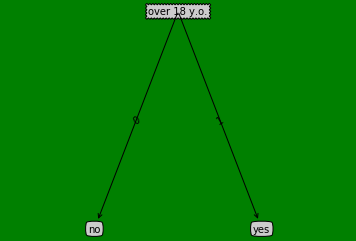

In [166]:
import operator
from math import log
from collections import Counter


def createDataSet():
    """DateSet 基础数据集
    Args:
        无需传入参数
    Returns:
        返回数据集和对应的label标签
    """
    #使否為長輩?
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [0, 1, 'no'],
               [0, 1, 'no'],
               [1, 0, 'yes'],
               [1, 0, 'yes'],
               [1, 1, 'yes']]
    # dataSet = [['yes'],
    #         ['yes'],
    #         ['no'],
    #         ['no'],
    #         ['no']]
    # labels  >18   戴眼鏡
    labels = ['over 18 y.o.', 'glasses']
    # change to discrete values
    return dataSet, labels


def calcShannonEnt(dataSet):
    """calcShannonEnt(calculate Shannon entropy 计算给定数据集的香农熵)
    Args:
        dataSet 数据集
    Returns:
        返回 每一组feature下的某个分类下，香农熵的信息期望
    """
    # -----------计算香农熵的第一种实现方式start--------------------------------------------------------------------------------
    # 求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)
    # 下面输出我们测试的数据集的一些信息
    # 例如：<type 'list'> numEntries:  5 是下面的代码的输出
    # print type(dataSet), 'numEntries: ', numEntries

    # 计算分类标签label出现的次数
    labelCounts = {}
    # the the number of unique elements and their occurance
    for featVec in dataSet:
        # 将当前实例的标签存储，即每一行数据的最后一个数据代表的是标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的键值不存在，则扩展字典并将当前键值加入字典。每个键值都记录了当前类别出现的次数。
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        # print '-----', featVec, labelCounts

    # 对于label标签的占比，求出label标签的香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 使用所有类标签的发生频率计算类别出现的概率。
        prob = float(labelCounts[key])/numEntries
        # log base 2 
        # 计算香农熵，以 2 为底求对数
        shannonEnt -= prob * log(prob, 2)
        # print '---', prob, prob * log(prob, 2), shannonEnt
    # -----------计算香农熵的第一种实现方式end--------------------------------------------------------------------------------

    # # -----------计算香农熵的第二种实现方式start--------------------------------------------------------------------------------
    # # 统计标签出现的次数
    # label_count = Counter(data[-1] for data in dataSet)
    # # 计算概率
    # probs = [p[1] / len(dataSet) for p in label_count.items()]
    # # 计算香农熵
    # shannonEnt = sum([-p * log(p, 2) for p in probs])
    # # -----------计算香农熵的第二种实现方式end--------------------------------------------------------------------------------
    return shannonEnt


def splitDataSet(dataSet, index, value):
    """splitDataSet(通过遍历dataSet数据集，求出index对应的colnum列的值为value的行)
        就是依据index列进行分类，如果index列的数据等于 value的时候，就要将 index 划分到我们创建的新的数据集中
    Args:
        dataSet 数据集                 待划分的数据集
        index 表示每一行的index列        划分数据集的特征
        value 表示index列对应的value值   需要返回的特征的值。
    Returns:
        index列为value的数据集【该数据集需要排除index列】
    """
    # -----------切分数据集的第一种方式 start------------------------------------
    retDataSet = []
    for featVec in dataSet: 
        # index列为value的数据集【该数据集需要排除index列】
        # 判断index列的值是否为value
        if featVec[index] == value:
            # chop out index used for splitting
            # [:index]表示前index行，即若 index 为2，就是取 featVec 的前 index 行
            reducedFeatVec = featVec[:index]
            '''
            请百度查询一下： extend和append的区别
            list.append(object) 向列表中添加一个对象object
            list.extend(sequence) 把一个序列seq的内容添加到列表中
            1、使用append的时候，是将new_media看作一个对象，整体打包添加到music_media对象中。
            2、使用extend的时候，是将new_media看作一个序列，将这个序列和music_media序列合并，并放在其后面。
            result = []
            result.extend([1,2,3])
            print result
            result.append([4,5,6])
            print result
            result.extend([7,8,9])
            print result
            结果：
            [1, 2, 3]
            [1, 2, 3, [4, 5, 6]]
            [1, 2, 3, [4, 5, 6], 7, 8, 9]
            '''
            reducedFeatVec.extend(featVec[index+1:])
            # [index+1:]表示从跳过 index 的 index+1行，取接下来的数据
            # 收集结果值 index列为value的行【该行需要排除index列】
            retDataSet.append(reducedFeatVec)
    # -----------切分数据集的第一种方式 end------------------------------------

    # # -----------切分数据集的第二种方式 start------------------------------------
    # retDataSet = [data for data in dataSet for i, v in enumerate(data) if i == axis and v == value]
    # # -----------切分数据集的第二种方式 end------------------------------------
    return retDataSet


def chooseBestFeatureToSplit(dataSet):
    """chooseBestFeatureToSplit(选择最好的特征)
    Args:
        dataSet 数据集
    Returns:
        bestFeature 最优的特征列
    """

    # -----------选择最优特征的第一种方式 start------------------------------------
    # 求第一行有多少列的 Feature, 最后一列是label列嘛
    numFeatures = len(dataSet[0]) - 1
    # label的信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        # create a list of all the examples of this feature
        # 获取每一个实例的第i+1个feature，组成list集合
        featList = [example[i] for example in dataSet]
        # get a set of unique values
        # 获取剔重后的集合，使用set对list数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        print('infoGain=', infoGain, 'bestFeature=', i, baseEntropy, newEntropy)
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature
    # -----------选择最优特征的第一种方式 end------------------------------------

    # # -----------选择最优特征的第二种方式 start------------------------------------
    # # 计算初始香农熵
    # base_entropy = calcShannonEnt(dataSet)
    # best_info_gain = 0
    # best_feature = -1
    # # 遍历每一个特征
    # for i in range(len(dataSet[0]) - 1):
    #     # 对当前特征进行统计
    #     feature_count = Counter([data[i] for data in dataSet])
    #     # 计算分割后的香农熵
    #     new_entropy = sum(feature[1] / float(len(dataSet)) * calcShannonEnt(splitDataSet(dataSet, i, feature[0])) \
    #                    for feature in feature_count.items())
    #     # 更新值
    #     info_gain = base_entropy - new_entropy
    #     print('No. {0} feature info gain is {1:.3f}'.format(i, info_gain))
    #     if info_gain > best_info_gain:
    #         best_info_gain = info_gain
    #         best_feature = i
    # return best_feature
    # # -----------选择最优特征的第二种方式 end------------------------------------


def majorityCnt(classList):
    """majorityCnt(选择出现次数最多的一个结果)
    Args:
        classList label列的集合
    Returns:
        bestFeature 最优的特征列
    """
    # -----------majorityCnt的第一种方式 start------------------------------------
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 倒叙排列classCount得到一个字典集合，然后取出第一个就是结果（yes/no），即出现次数最多的结果
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    # print 'sortedClassCount:', sortedClassCount
    return sortedClassCount[0][0]
    # -----------majorityCnt的第一种方式 end------------------------------------

    # # -----------majorityCnt的第二种方式 start------------------------------------
    # major_label = Counter(classList).most_common(1)[0]
    # return major_label
    # # -----------majorityCnt的第二种方式 end------------------------------------


def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    # 如果数据集的最后一列的第一个值出现的次数=整个集合的数量，也就说只有一个类别，就只直接返回结果就行
    # 第一个停止条件：所有的类标签完全相同，则直接返回该类标签。
    # count() 函数是统计括号中的值在list中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果数据集只有1列，那么最初出现label次数最多的一类，作为结果
    # 第二个停止条件：使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选择最优的列，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 获取label的名称
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree
    myTree = {bestFeatLabel: {}}
    # 注：labels列表是可变对象，在PYTHON函数中作为参数时传址引用，能够被全局修改
    # 所以这行代码导致函数外的同名变量被删除了元素，造成例句无法执行，提示'no surfacing' is not in list
    del(labels[bestFeat])
    # 取出最优列，然后它的branch做分类
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求出剩余的标签label
        subLabels = labels[:]
        # 遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        # print 'myTree', value, myTree
    return myTree


def classify(inputTree, featLabels, testVec):
    """classify(给输入的节点，进行分类)
    Args:
        inputTree  决策树模型
        featLabels Feature标签对应的名称
        testVec    测试输入的数据
    Returns:
        classLabel 分类的结果值，需要映射label才能知道名称
    """
    # 获取tree的根节点对于的key值
    firstStr = list(inputTree.keys())[0]
    # 通过key得到根节点对应的value
    secondDict = inputTree[firstStr]
    # 判断根节点名称获取根节点在label中的先后顺序，这样就知道输入的testVec怎么开始对照树来做分类
    featIndex = featLabels.index(firstStr)
    # 测试数据，找到根节点对应的label位置，也就知道从输入的数据的第几位来开始分类
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print('+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat)
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel


def storeTree(inputTree, filename):
    import pickle
    # -------------- 第一种方法 start --------------
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()
    # -------------- 第一种方法 end --------------

    # -------------- 第二种方法 start --------------
    with open(filename, 'wb') as fw:
        pickle.dump(inputTree, fw)
    # -------------- 第二种方法 start --------------


def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)


def fishTest():
    # 1.创建数据和结果标签
    myDat, labels = createDataSet()
    # print myDat, labels

    # 计算label分类标签的香农熵
    # calcShannonEnt(myDat)

    # # 求第0列 为 1/0的列的数据集【排除第0列】
    # print '1---', splitDataSet(myDat, 0, 1)
    # print '0---', splitDataSet(myDat, 0, 0)

    # # 计算最好的信息增益的列
    # print chooseBestFeatureToSplit(myDat)

    import copy
    myTree = createTree(myDat, copy.deepcopy(labels))
    print(myTree)
    # [1, 1]表示要取的分支上的节点位置，对应的结果值
    print(classify(myTree, labels, [1, 1]))
    
    # 获得树的高度
    print(get_tree_height(myTree))

    # 画图可视化展现
    createPlot(myTree)


def ContactLensesTest():
    """
    Desc:
        预测隐形眼镜的测试代码
    Args:
        none
    Returns:
        none
    """

    # 加载隐形眼镜相关的 文本文件 数据
    fr = open('data/3.DecisionTree/lenses.txt')
    # 解析数据，获得 features 数据
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    # 得到数据的对应的 Labels
    lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
    # 使用上面的创建决策树的代码，构造预测隐形眼镜的决策树
    lensesTree = createTree(lenses, lensesLabels)
    print(lensesTree)
    # 画图可视化展现
    dtPlot.createPlot(lensesTree)
    
    
def get_tree_height(tree):
    """
     Desc:
        递归获得决策树的高度
    Args:
        tree
    Returns:
        树高
    """

    if not isinstance(tree, dict):
        return 1

    child_trees = list(tree.values())[0].values()

    # 遍历子树, 获得子树的最大高度
    max_height = 0
    for child_tree in child_trees:
        child_tree_height = get_tree_height(child_tree)

        if child_tree_height > max_height:
            max_height = child_tree_height

    return max_height + 1
import matplotlib.pyplot as plt

# 定义文本框 和 箭头格式 【 sawtooth 波浪方框, round4 矩形方框 , fc表示字体颜色的深浅 0.1~0.9 依次变浅，没错是变浅】
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是否为dict, 不是+1
        if type(secondDict[key]) is dict:
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是不是dict, 求分枝的深度
        if type(secondDict[key]) is dict:
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        # 记录最大的分支深度
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction', xytext=centerPt,
                            textcoords='axes fraction', va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)


def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


def plotTree(myTree, parentPt, nodeTxt):
    # 获取叶子节点的数量
    numLeafs = getNumLeafs(myTree)
    # 获取树的深度
    # depth = getTreeDepth(myTree)

    # 找出第1个中心点的位置，然后与 parentPt定点进行划线
    # x坐标为 (numLeafs-1.)/plotTree.totalW/2+1./plotTree.totalW，化简如下
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    # print cntrPt
    # 并打印输入对应的文字
    plotMidText(cntrPt, parentPt, nodeTxt)

    firstStr = list(myTree.keys())[0]
    # 可视化Node分支点；第一次调用plotTree时，cntrPt与parentPt相同
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    # 根节点的值
    secondDict = myTree[firstStr]
    # y值 = 最高点-层数的高度[第二个节点位置]；1.0相当于树的高度
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        # 判断该节点是否是Node节点
        if type(secondDict[key]) is dict:
            # 如果是就递归调用[recursion]
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 如果不是，就在原来节点一半的地方找到节点的坐标
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            # 可视化该节点位置
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            # 并打印输入对应的文字
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD


def createPlot(inTree):
    # 创建一个figure的模版
    fig = plt.figure(1, facecolor='green')
    fig.clf()

    axprops = dict(xticks=[], yticks=[])
    # 表示创建一个1行，1列的图，createPlot.ax1 为第 1 个子图，
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)

    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    # 半个节点的长度；xOff表示当前plotTree未遍历到的最左的叶节点的左边一个叶节点的x坐标
    # 所有叶节点中，最左的叶节点的x坐标是0.5/plotTree.totalW（因为totalW个叶节点在x轴方向是平均分布在[0, 1]区间上的）
    # 因此，xOff的初始值应该是 0.5/plotTree.totalW-相邻两个叶节点的x轴方向距离
    plotTree.xOff = -0.5 / plotTree.totalW
    # 根节点的y坐标为1.0，树的最低点y坐标为0
    plotTree.yOff = 1.0
    # 第二个参数是根节点的坐标
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()


# # 测试画图
# def createPlot():
#     fig = plt.figure(1, facecolor='white')
#     fig.clf()
#     # ticks for demo puropses
#     createPlot.ax1 = plt.subplot(111, frameon=False)
#     plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#     plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#     plt.show()


# 测试数据集


# 用测试数据绘制树
# myTree = retrieveTree(1)
# createPlot(myTree)

if __name__ == "__main__":
    fishTest()
    # ContactLensesTest()

In [ ]:
url = 'https://tmcc.cwgv.com.tw/article_content_AR0000818_77.html'

In [17]:
webbrowser.open_new(url)
time.sleep(15)
im = pyautogui.screenshot()

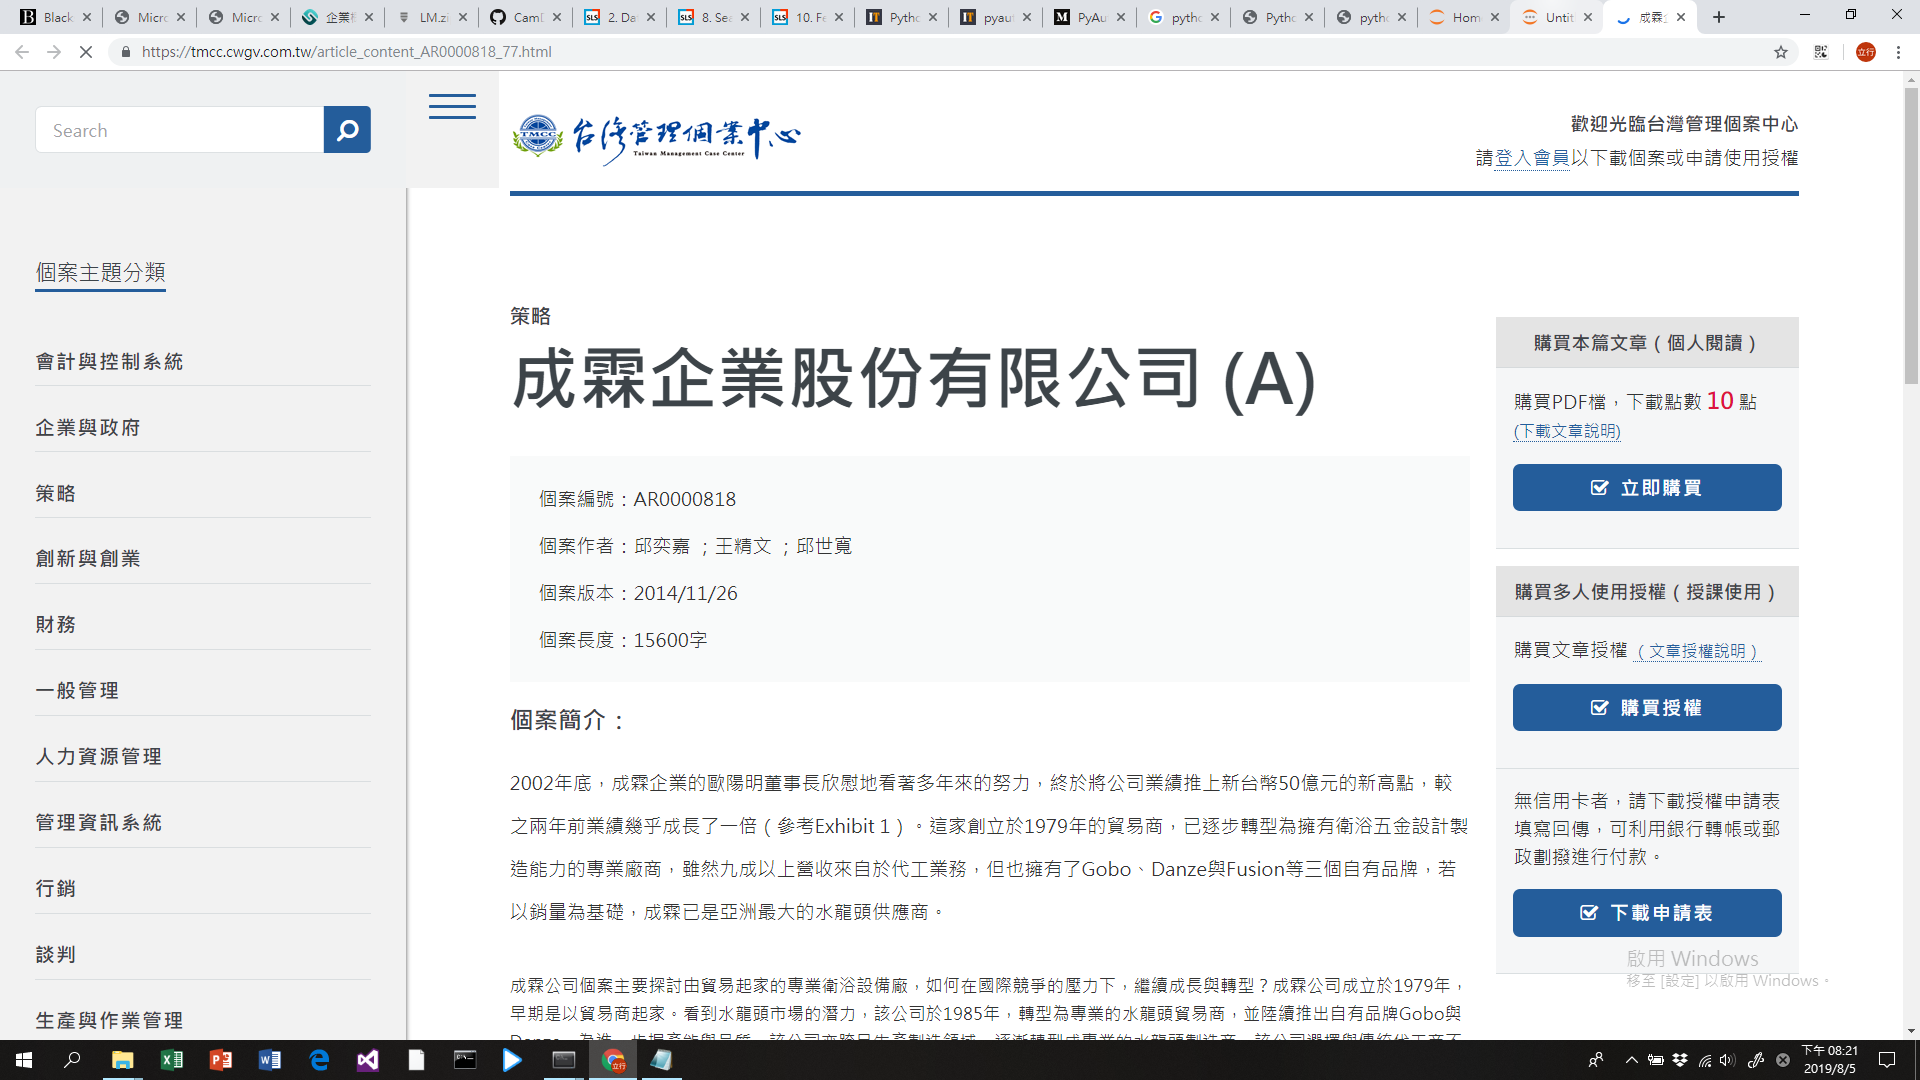

In [18]:
im

In [22]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Austin\AppData\Local\LocalTesseract-OCR'
text=pytesseract.image_to_string(im,lang='chi_tra')
print(text)

TesseractNotFoundError: C:\Users\Austin\AppData\Local\LocalTesseract-OCR is not installed or it's not in your path

In [5]:
import pyautogui
pyautogui.PAUSE = 1
pyautogui.FAILSAFE = True      # 啟用自動防故障功能
width,height = pyautogui.size()

In [ ]:
## 使用 pyautogui 模組相關函式，可以模擬滑鼠及鍵盤操作， 完整說明文件見: http://pyautogui.readthedocs.org/
# pip install pyautogui
# 要注意的是，模擬移動滑鼠與擊鍵可能太快，導致其他程式跟不上，並且程式可能失去控制，
# 需要掌握如何從問題中恢復，至少要能中止它。
# 防止或恢復GUI自動化問題
#  1) 使用pyautogui.PAUSE設定每個PyAutoGUI函式呼叫在執行動作後暫停的秒數
#  2) pyautogui自動防故障功能：將滑鼠移到螢幕的左上角，來丟擲failSafeException異常
import pyautogui
pyautogui.PAUSE = 1
pyautogui.FAILSAFE = True      # 啟用自動防故障功能
width,height = pyautogui.size()   # 螢幕的寬度和高度
pyautogui.position()        # 滑鼠當前位置
## 控制滑鼠移動
for i in range(10):
  pyautogui.moveTo(100,100,duration=0.25)   # 移動到 (100,100)
  pyautogui.moveTo(200,100,duration=0.25)
  pyautogui.moveTo(200,200,duration=0.25)
  pyautogui.moveTo(100,200,duration=0.25)
for i in range(10):
  pyautogui.moveRel(100,0,duration=0.25)    # 從當前位置右移100畫素
  pyautogui.moveRel(0,100,duration=0.25)    # 向下
  pyautogui.moveRel(-100,0,duration=0.25)   # 向左
  pyautogui.moveRel(0,-100,duration=0.25)   # 向上
## 例子:持續獲取滑鼠位置並更新顯示
# 1.獲取當前座標
# 2.在螢幕上列印，並刪除之前列印的座標
# 3.處理異常，並能按鍵退出
# Displays the mouse cursor's currrent position.
import pyautogui
print('Press Ctrl-C to quit.')
try:
  while True:
    # Get and print the mouse coordinates.
    x,y = pyautogui.position()
    positionStr = 'X: '+str(x).rjust(4)+' Y:'+str(y).rjust(4)
    pix = pyautogui.screenshot().getpixel((x,y))  # 獲取滑鼠所在螢幕點的RGB顏色
    positionStr += ' RGB:('+str(pix[0]).rjust(3)+','+str(pix[1]).rjust(3)+','+str(pix[2]).rjust(3)+')'
    print(positionStr,end='')           # end='' 替換了預設的換行
    print('\b'*len(positionStr),end='',flush=True) # 連續退格鍵並重新整理，刪除之前列印的座標，就像直接更新座標效果
except KeyboardInterrupt:               # 處理 Ctrl-C 按鍵
  print('\nDone.')
## 控制滑鼠互動
# pyautogui.click() 封裝了 pyautogui.mouseDown()和pyautogui.mouseUp(), 這兩個函式也可以單獨使用
# pyautogui.doubleClick() 雙擊左鍵， pyautogui.rightClick() 雙擊右鍵，pyautogui.middleClick() 雙擊中鍵
import pyautogui
pyautogui.click(10,5)           # 在(10,5)單擊滑鼠，預設左鍵
pyautogui.click(100,150,button='left')
pyautogui.click(200,250,button='right')
# pyautogui.dragTo()  按鍵並拖動滑鼠移動，引數為座標，與moveTo相同
# pyautogui.dragRel()  按鍵並拖動滑鼠移動，引數為距離，與moveRel相同
import pyautogui,time
time.sleep(5)
# 這裡停頓5秒，用於手工開啟windows繪圖應用，並選中鉛筆或畫圖工具，讓滑鼠停留在畫圖工具的視窗中
# 或使用線上paint (http://sumopaint.com)
pyautogui.click()   # click to put drawing program in focus
distance = 200
while distance > 0 :
  pyautogui.dragRel(distance,0,duration=0.2) # move right
  distance = distance - 5
  pyautogui.dragRel(0,distance,duration=0.2) # move down
  pyautogui.dragRel(-distance,0,duration=0.2) # move left
  distance = distance - 5
  pyautogui.dragRel(0,-distance,duration=0.2) # move up
print('Done')
pyautogui.scroll(200)     # 滑鼠向上滾動200畫素
pyautogui.scroll(-100)    #   負數向下
import pyperclip
numbers = ''
for i in range(200):
  numbers = numbers + str(i) + '\n'
pyperclip.copy(numbers)
print(numbers)
# 這裡手動開啟一個文字視窗，貼上
import time,pyautogui
time.sleep(5);pyautogui.scroll(100)
## 分析螢幕快照
import pyautogui
im = pyautogui.screenshot()   # 獲取螢幕快照
im.getpixel((50,200))      # (130,135,144)
pyautogui.pixelMatchesColor(50,200,(130,135,144))  # True 可用來判斷螢幕是否發生變化
pyautogui.pixelMatchesColor(50,200,(255,135,144))  # False
# 影象定位識別
pyautogui.locateOnScreen('submit.png')  # 在螢幕上查詢匹配與檔案相同的區域--每個區域畫素都要相同 左,頂,寬,高
pyautogui.center(pyautogui.locateOnScreen('submit.png')) # 獲取匹配影象中心點座標
pyautogui.click((678,759))        # 點選該區域核心
list(pyautogui.locateAllOnScreen('submit.png'))  # 匹配到多處，返回區域list
## 控制鍵盤
pyautogui.click(100,100);pyautogui.typewrite('Hello python')
pyautogui.typewrite(['a','b','left','left','X','Y']) # typewrite可傳入擊鍵列表，這裡輸出XYab，left是左箭頭
print(pyautogui.KEYBOARD_KEYS)      # pyautogui接受的所有可能字串
pyautogui.press('enter')         # 接受按鍵命令
pyautogui.keyDown('shift');pyautogui.press('4');pyautogui.keyUp('shift')  # 輸出 $ 符號的按鍵
#熱鍵組合
pyautogui.keyDown('ctrl')
pyautogui.keyDown('c')
pyautogui.keyUp('c')
pyautogui.keyUp('ctrl')
# 這四句是組合 ctrl-c，類似這種順序按下，再反序釋放的，可以用hotkey()
pyautogui.hotkey('ctrl','c')        # 同上面四句，組合鍵
pyautogui.hotkey('ctrl','alt','shift','s') # Ctrl-Alt-Shift-S 熱鍵組合
## 綜合例子: 自動填表程式
# http://autbor.com/form
# 將電子表格中的大量資料自動輸入到另一個應用的表單介面
# 1.點選表單的第一個文字欄位
# 2.遍歷表單，再每個輸入欄鍵入資訊
# 3.點選submit按鈕
# 4.用下一組資料重複這個過程
# Automatically fills in the form.
import pyautogui,time
# set these to the correct coordinates for your computer.
nameField = (648,319)
submitButton = (651,817)
submitButtonColor = (75,141,249)
submitAnotherLink = (760,224)
formData = [{'name':'Alice','fear':'eavppers','source':'wand','robocop':4,'comments':'Tell us'},
      {'name':'Bog','fear':'eaves','source':'crystal','robocop':4,'comments':'Big room'},
      {'name':'Kad','fear':'apple','source':'woold','robocop':1,'comments':'Nice day'},
      {'name':'Cace','fear':'ppers','source':'ball','robocop':5,'comments':'n/a'}
      ]
pyautogui.PAUSE = 0.5
for person in formData:
  # Give the user a chance to kill the script.
  print('>>> 5 SECOND PAUSE TO LET USER PRESS CTRL-C <<<')
  time.sleep(5)
  # Wait until the form page has loaded.
  while not pyautogui.pixelMatchesColor(submitButton[0],submitButton[1],submitButtonColor):
    time.sleep(0.5)
  print('Entering %s info...' % (person['name']))
  pyautogui.click(nameField[0],nameField[1])    # 單擊第一個文字欄位輸入位置
  # Fill out the Name field.
  pyautogui.typewrite(person['name']+'\t')     # 輸入該域，並按下 tab 鍵，將焦點轉向下一個輸入框
  # Fill out the Greatest Fear(s) field.
  pyautogui.typewrite(person['fear']+'\t')
  # 處理下拉框
  # Fill out the Source of Wizard Powers Field
  if person['source'] == 'wand':
    pyautogui.typewrite(['down','\t'])
  elif person['source'] == 'crystal':
    pyautogui.typewrite(['down','down','\t'])
  elif person['source'] == 'woold':
    pyautogui.typewrite(['down','down','down','\t'])
  elif person['source'] == 'ball':
    pyautogui.typewrite(['down','down','down','down','\t'])
  # 處理單選按鈕
  # Fill out the RoboCop field
  if person['robocop'] == 1:
    pyautogui.typewrite([' ','\t'])
  elif person['robocop'] == 2:
    pyautogui.typewrite(['right','\t'])
  elif person['robocop'] == 3:
    pyautogui.typewrite(['right','right','\t'])
  elif person['robocop'] == 4:
    pyautogui.typewrite(['right','right','right','\t'])
  elif person['robocop'] == 5:
    pyautogui.typewrite(['right','right','right','right','\t'])
  # Fill out the Additional Comments field.
  pyautogui.typewrite(person['comments']+'\t')
  # Click Submit.
  pyautogui.press('enter')
  # Wait until form page has loaded.
  print('Clicked submit.')
  time.sleep(5)
  # Click the Submit another response link.
  pyautogui.click(submitAnotherLink[0],submitAnotherLink[1])